In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

In [3]:
# Let Omega=[0,1]^2 in R^2 and let x_1,...,x_m be uniformly distributed random points in Omega. 
# Define X = {x_1,...,x_m} be our scattered data points. 
m = 2048
X = np.random.uniform(low=0, high=1, size=(m, 2)) # IS THIS CORRECT?

In [4]:
# Define the weighted graph G={X,W} with the weight matrix W in R^{mxm} be defined by
# w_ij = k_eps(||x_i - x_j||_2), where k_eps(t) := 1/(pi*eps^2) if t<=eps and 0 if t>eps.
# The parameter eps>0 controls the bandwidth of kernel k and thus the local connectivity of graph G.
# Let eps be given by eps = C*log(m)^(3/4)/m^(1/2) where C>0 is a constant (C=1 should be sufficient).
k_eps = lambda t, eps: 1/(np.pi*eps**2) if t<=eps else 0

W = np.zeros((m, m))
C = 1.0
eps = C*np.log(m)**(3/4)/m**(1/2)

for i in range(m):
    for j in range(m):
        W[i][j] = k_eps(np.linalg.norm(X[i]-X[j], 2), eps)


In [12]:
W

array([[30.96370066,  0.        ,  0.        , ...,  0.        ,
         0.        , 30.96370066],
       [ 0.        , 30.96370066,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 30.96370066, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 30.96370066,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        30.96370066,  0.        ],
       [30.96370066,  0.        ,  0.        , ...,  0.        ,
         0.        , 30.96370066]])

In [5]:
# Let L = D - W be the unnormalized graph Laplacian matrix of G, where D is the diagonal degree matrix of G --> d_i = sum_j w_ij.
D = np.diag(np.sum(W, axis=1))
L = D - W

print(L[:5, :5])

[[2136.49534564    0.            0.            0.            0.        ]
 [   0.         2043.60424365    0.            0.            0.        ]
 [   0.            0.         2353.24125027    0.            0.        ]
 [   0.            0.            0.         1176.62062513    0.        ]
 [   0.            0.            0.            0.         1950.71314167]]


In [6]:
# Compute the first four eigenvectors of L (i.e. those corresponding to the four smallest eigenvalues of L).
evals, evecs = np.linalg.eig(L)

# Sort the eigenvalues and eigenvectors in ascending order.
idx = evals.argsort() #[::-1]
evals = np.real(evals[idx])
evecs = np.real(evecs[:, idx])

In [7]:
evals[:4]

array([-2.66453526e-13,  2.23746315e+01,  2.44019074e+01,  4.43502063e+01])

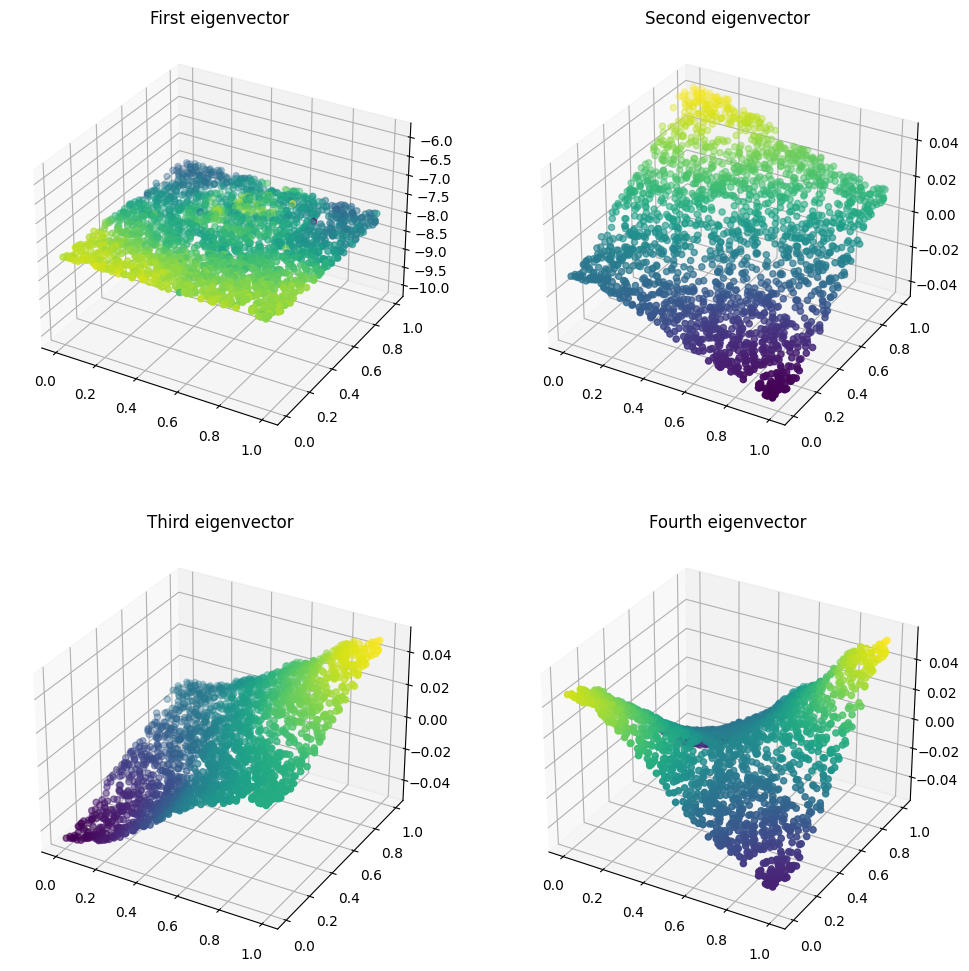

In [8]:
# Plot the first four eigenvectors as functions over Omega. Use 3D scatter plots or contour plots.
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(X[:, 0], X[:, 1], evecs[:, 0], c=evecs[:, 0], cmap='viridis')
ax.set_title('First eigenvector')
ax = fig.add_subplot(222, projection='3d')
ax.scatter(X[:, 0], X[:, 1], evecs[:, 1], c=evecs[:, 1], cmap='viridis')
ax.set_title('Second eigenvector')
ax = fig.add_subplot(223, projection='3d')
ax.scatter(X[:, 0], X[:, 1], evecs[:, 2], c=evecs[:, 2], cmap='viridis')
ax.set_title('Third eigenvector')
ax = fig.add_subplot(224, projection='3d')
ax.scatter(X[:, 0], X[:, 1], evecs[:, 3], c=evecs[:, 3], cmap='viridis')
ax.set_title('Fourth eigenvector')
plt.show()

(4096, 4096)
(4096, 4096)


TypeError: Input z must be 2D, not 1D

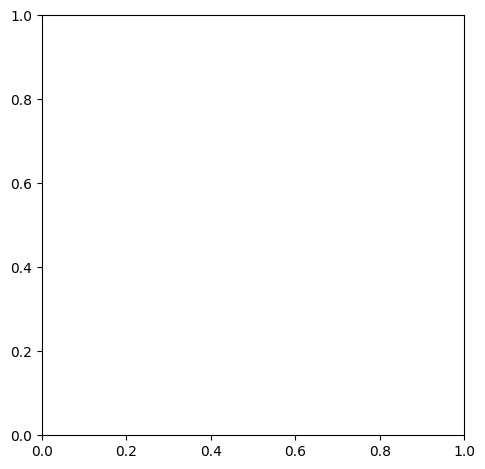

In [10]:
# Try plotting with contour plots (Create meshgrid)
xx, xy = np.meshgrid(X,X)

print(xx.shape)
print(xy.shape)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(221)
ax.contourf(xx, xy, evecs[:, 0], cmap='viridis')
# ax.contourf(X[:, 0], X[:, 1], evecs[:, 0], cmap='viridis')
# ax.set_title('First eigenvector')
# ax = fig.add_subplot(222)
# ax.contourf(X[:, 0], X[:, 1], evecs[:, 1], cmap='viridis')
# ax.set_title('Second eigenvector')
# ax = fig.add_subplot(223)
# ax.contourf(X[:, 0], X[:, 1], evecs[:, 2], cmap='viridis')
# ax.set_title('Third eigenvector')
# ax = fig.add_subplot(224)
# ax.contourf(X[:, 0], X[:, 1], evecs[:, 3], cmap='viridis')
# ax.set_title('Fourth eigenvector')

In [11]:
evecs[:, 0]

array([-0.02209709, -0.02209709, -0.02209709, ..., -0.02209709,
       -0.02209709, -0.02209709])